In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

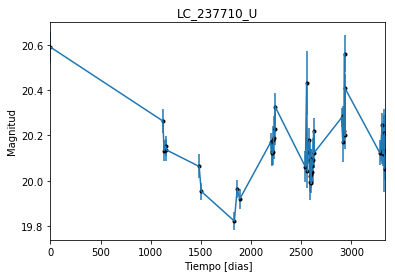

In [2]:
data = np.genfromtxt('LC_237710_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_237710_U')
plt.savefig("LC_237710_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

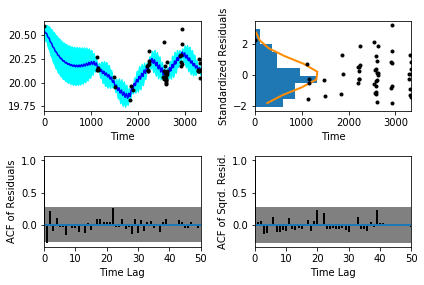

In [5]:
sample.assess_fit()

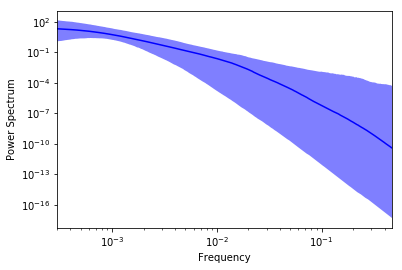

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

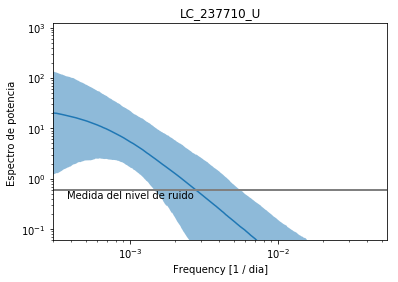

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_237710_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_237710_U')

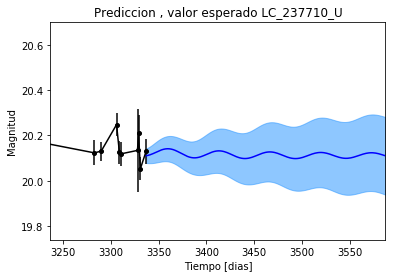

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_237710_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_237710_U')

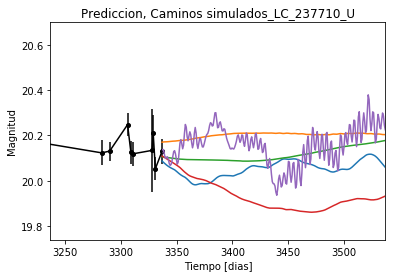

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_237710_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


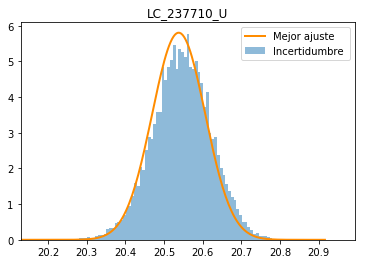

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_237710_U')
plt.savefig("Mejor_ajuste_LC_237710_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_237710_U')

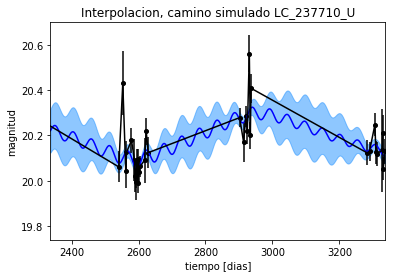

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_U')

Text(0.5,1,'Interpolacion, camino simulado LC_237710_U')

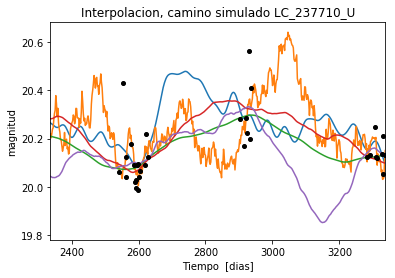

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 700.950921725
Median: 0.0122525704508
Standard deviation: 0.169026893805
68% credibility interval: [ 0.00091353  0.17274705]
95% credibility interval: [  3.51643183e-04   6.56767858e-01]
99% credibility interval: [  3.05920593e-04   8.83781828e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 807.54973228
Median: 0.00222040397875
Standard deviation: 0.0838806732938
68% credibility interval: [ 0.00045729  0.03634409]
95% credibility interval: [ 0.0003184   0.29060329]
99% credibility interval: [  3.03703980e-04   5.51979939e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 683.520320614
Median: 0.0323804990338
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1266.45006735
Median: 62.443745479
Standard deviation: 1.61034586592
68% credibility interval: [ 60.68031402  63.62537928]
95% credibility interval: [ 58.30292667  64.54421726]
99% credibility interval: [ 56.27619462  65.04677934]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 511.002352314
Median: 0.776514506509
Standard deviation: 2.02035790101
68% credibility interval: [ 0.06936084  3.59487706]
95% credibility interval: [ 0.01506522  6.8713138 ]
99% credibility interval: [  0.010463    10.33900295]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 352.912569795
Median: 0.533826592419
Standard deviation: 8.48974975459
68% credibility interval: [ 0.01460512  8.10761446]
95% credibility interval: [  5.98004535e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1897.67804292
Median: 4.58965525279e-41
Standard deviation: 7.58053550322e+146
68% credibility interval: [  1.28078934e-141   1.44648211e-004]
95% credibility interval: [  3.77621980e-207   2.12916409e+116]
99% credibility interval: [  3.27213421e-215   8.78780868e+143]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2115.66628554
Median: 20.1862833187
Standard deviation: 0.120686025646
68% credibility interval: [ 20.09503093  20.30073849]
95% credibility interval: [ 19.96642543  20.44752185]
99% credibility interval: [ 19.83847007  20.60045972]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 286.110456771
Median: 0.0139102549575
Standard deviation: 0.239402247038
68% credibility interval: [ 0.          0.37465549]
95% credibility interval: [ 0.          0.85704728]
99% credibility interval: [ 0.          0.92165603]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 286.110456771
Median: 0.0139102549575
Standard deviation: 0.239402247038
68% credibility interval: [ 0.          0.37465549]
95% credibility interval: [ 0.          0.85704728]
99% credibility interval: [ 0.          0.92165603]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 853.676730621
Median: 0.0
Standard deviation: 0.000392200293793
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1266.45006735
Median: 62.443745479
Standard deviation: 1.61034586592
68% credibility interval: [ 60.68031402  63.62537928]
95% credibility interval: [ 58.30292667  64.54421726]
99% credibility interval: [ 56.27619462  65.04677934]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2272.45867387
Median: 0.043876529931
Standard deviation: 0.0601937727253
68% credibility interval: [ 0.02558124  0.08750603]
95% credibility interval: [ 0.01607865  0.20432706]
99% credibility interval: [ 0.01186747  0.37086163]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 909.384494983
Median: 1.24538954925
Standard deviation: 0.211268758134
68% credibility interval: [ 1.05353079  1.46900809]
95% credibility interval: [ 0.88229902  1.72160341]
99% credibility interval: [ 0.79667784  1.86544843]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 374.17804177
Median: 0.000250908942762
Standard deviation: 0.200567001015
68% credibility interval: [  9.53236294e-07   2.16330402e-02]
95% credibility interval: [  7.61855113e-121   5.70890077e-001]
99% credibility interval: [  2.20439815e-147   1.40540686e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 700.950921725
Median: (-0.0769851706317-0.015736939609j)
Standard deviation: 1.84134345874
68% credibility interval: [-1.08540175+0.j         -0.00573986-0.81637046j]
95% credibility interval: [ -4.12659415e+00+0.j          -2.20943928e-03-0.09885126j]
99% credibility interval: [ -5.55296500e+00+0.j          -1.92215578e-03-0.00850865j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 807.54973228
Median: (-0.0139512096553+0.29736711286j)
Standard deviation: 1.59386718821
68% credibility interval: [-0.22835665+0.86309387j -0.00287322+0.76451502j]
95% credibility interval: [-1.82591431+2.20420579j -0.00200054+2.48839513j]
99% credibility interval: [ -3.46819224e+00+5.13505389j  -1.90822838e-03+1.74208337j]
Posterior summ